## Analysis of Ford GoBike System.

### By Sandhya Dhanikonda

### Investigation Overview
>I selected Ford GoBike dataset in order to investigate bike hiring trends. There are a lot of different variables and our main focus is to define the most common variables which effect the bike hiring program in SF.

### Dataset Overview
>The data consisted of 16 different variables such as age, gender, weekday, time and others. It contains 2.75 million rides. Ages in dataset from 10to60 takes 95% of the users in dataset. 
Also, I created new fields as 'age group' in order to sort users in to groups and analyze the data by using groups.
I analysed the trends of usage of bike system by different age groups monthly, weekly and hourly.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import datetime
% matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
ford_clean = pd.read_csv('clean_ford_file.csv')

#### Rides distributed as per user type:
>Curently there are two types of Users: Subscribers And Customers. Subscribers have monthly subscription to the system. Customers are occasional users, either one time or for 1-2 days. The proprtion of the types of user is distributed as:

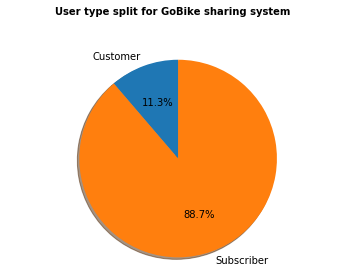

In [17]:
customer = ford_clean.query("user_type== 'Customer'")['bike_id'].count()
subscriber =ford_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop= customer/ford_clean.bike_id.count()
subscriber_prop=subscriber/ford_clean.bike_id.count()
labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
#explode = (0, 0.1)

plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=10, fontweight='bold');

 Age Distrubition of Users
>Here is the distrubition of users. Ages from 18 to 56 takes 95% of the users. Some of the users entered their ages incorrectly, there are some users who are more than 100 years old.  
It can be observed that 90% of the Users are under the age of 60, so it can be considered the users above the age of 60 to be outliers and hence remove them

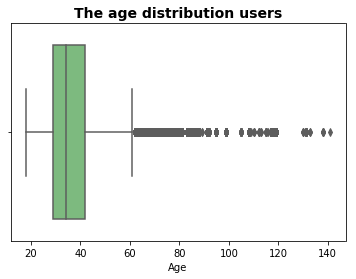

In [10]:
g=sb.boxplot(x='member_age', data=ford_clean, palette='Greens', orient='h')
g.set_title("The age distribution users", fontsize=14, fontweight="bold")
g.set_xlabel("Age");

Monthly usage distribution of the whole pupulation:

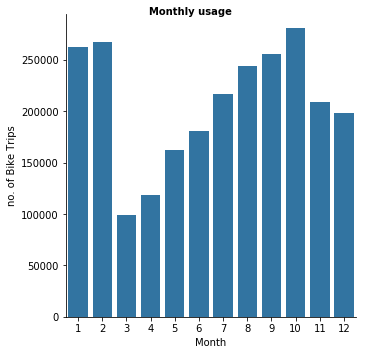

In [14]:
base_color=sb.color_palette()[0]
g = sb.catplot(data=ford_clean, x='st_month_#', kind='count', color = base_color)
g.set_axis_labels("Month", "no. of Bike Trips")
g.fig.suptitle('Monthly usage', fontsize=10, fontweight="bold");

Monthly usage distribution of Subscribers VS Customer

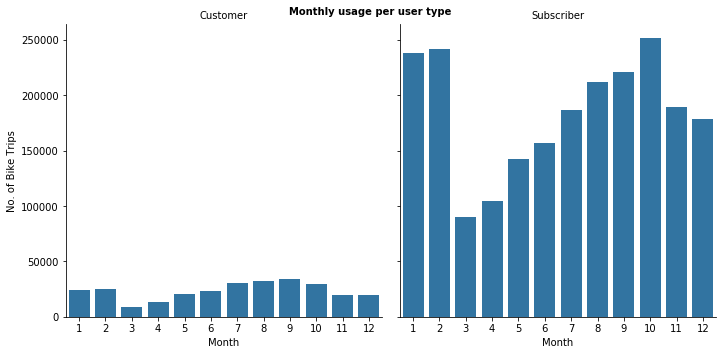

In [19]:
g = sb.catplot(data=ford_clean, x="st_month_#", col="user_type", kind="count", color=base_color)
g.set_titles("{col_name}")
g.set_axis_labels("Month", "No. of Bike Trips")
g.fig.suptitle('Monthly usage per user type', fontsize=10, fontweight='bold');

Monthly Useage distribution of of each user type in each age group

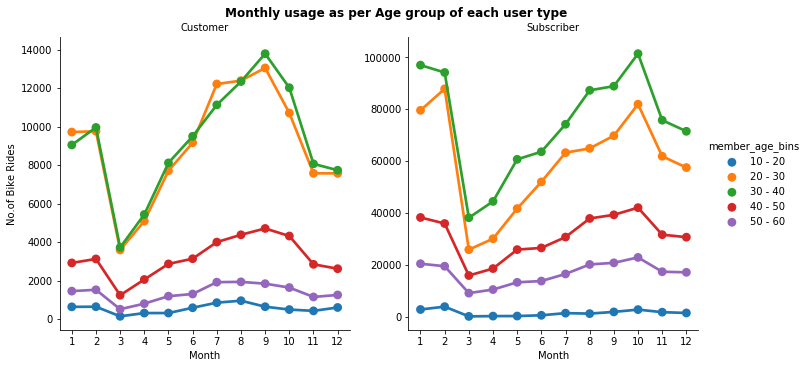

In [21]:
age_user_df=ford_clean.groupby(['member_age_bins','user_type','st_month_#']).agg({'bike_id':'count'}).reset_index()
g = sb.catplot(data=age_user_df, x='st_month_#',y='bike_id', col="user_type",
               hue='member_age_bins',kind="point",sharey=False);
g.fig.suptitle("Monthly usage as per Age group of each user type", fontsize=12, fontweight="bold",y=1.015)
g.set_axis_labels('Month','No.of Bike Rides')
g.set_titles("{col_name}");

Hourly usage distribution in a week by customers and subscribers.

In [23]:
hour_df_sub = ford_clean[(ford_clean['member_age']>=20)&(ford_clean['member_age']<40)
                       &(ford_clean['st_hr']>5)&(ford_clean['user_type']=='Subscriber')
                      ].groupby(['st_weekday','st_hr']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()
hour_df_sub['st_weekday'] = pd.Categorical(hour_df_sub['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

hour_df_cust = ford_clean[(ford_clean['member_age']>=20)&(ford_clean['member_age']<40)
                       &(ford_clean['st_hr']>5)&(ford_clean['user_type']=='Customer')
                      ].groupby(['st_weekday','st_hr']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()
hour_df_cust['st_weekday'] = pd.Categorical(hour_df_cust['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)



In [24]:
hour_df_sub['count_perc'] =hour_df_sub['count'].apply(lambda x: (x/hour_df_sub['count'].sum())*100)
hour_df_sub['rank'] = hour_df_sub['count_perc'].rank(ascending=False).astype(int)
hour_df_sub_pivoted = hour_df_sub.pivot_table(index='st_hr', columns='st_weekday', values='rank')

hour_df_cust['count_perc'] =hour_df_cust['count'].apply(lambda x: (x/hour_df_cust['count'].sum())*100)
hour_df_cust['rank'] = hour_df_cust['count_perc'].rank(ascending=False).astype(int)
hour_df_cust_pivoted = hour_df_cust.pivot_table(index='st_hr', columns='st_weekday', values='rank')

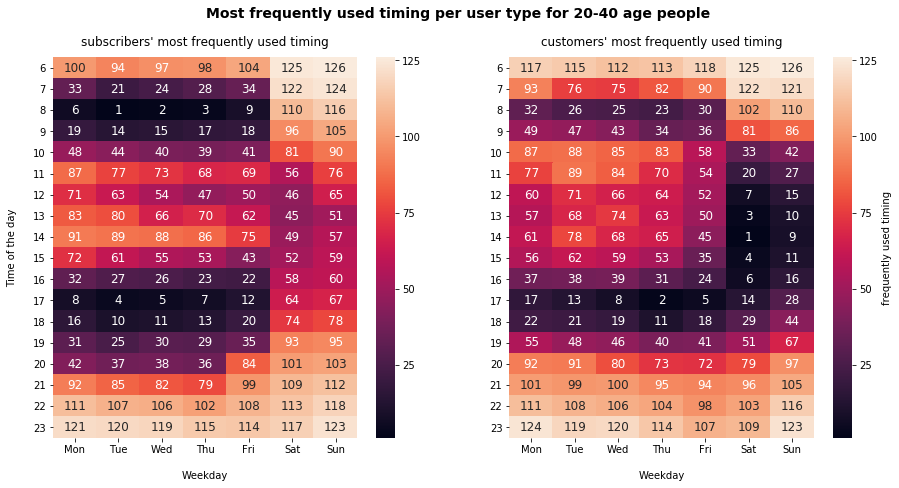

In [27]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.suptitle('Most frequently used timing per user type for 20-40 age people', fontsize=14,fontweight="bold")
sb.heatmap(hour_df_sub_pivoted, annot=True,fmt='d', annot_kws={"size": 12});
plt.title("subscribers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Time of the day', labelpad=16)
plt.yticks(rotation=360);
plt.subplot(122)
sb.heatmap(hour_df_cust_pivoted, annot=True,fmt='d', annot_kws={"size": 12}, cbar_kws={'label': 'frequently used timing'});
plt.title("customers' most frequently used timing", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ');
plt.yticks(rotation=360);